# Integration

# A simple vehicle energy model

## Input parameters:

* mass (kg): Mass of car and passengers
* efficiency (kWh/kWh): Conversion efficiency of motor electricity inputs into kinetic energy
* surface_area (m2): Frontal surface area of car
* aux_power (kW): Average power draw of auxillary systems, e.g. heating, control
* motor_power (kW): Max power of car motor
* max_recup (kWh/kWh): Max fraction of braking energy that can be recuperated
* min_recup_speed (km/h): Minimum speed at which braking recuperating system can operate
* Cr: Rolling resistance coefficient
* Cd: Aerodynamic resistance coefficient
* geno_eff (kWh/kWh): Efficiency of recuperating generator

Here are the static values for these coefficients:

* mass (kg): 1300
* efficiency (kWh/kWh): 0.85
* surface_area (m2): 2.41
* aux_power (kW): 0.721
* motor_power (kW): 80
* max_recup (kWh/kWh): 0.5
* min_recup_speed (km/h): 10
* Cr: 0.01
* Cd: 0.3
* geno_eff (kWh/kWh): 0.875

Our model also has some random noise added, so there are no perfect linear relationships between any parameters and any input parameters. We can see this by varying the motor efficency:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from car_model import energy_consumption
import matplotlib.pyplot as plt

In [3]:
efficiencies = np.linspace(0.8, 0.9, 1000)
results = np.array([energy_consumption(
    1300, efficiency, 2.41, 0.721, 80, 0.5, 10, 0.01, 0.3, 0.875
    ) for efficiency in efficiencies
])

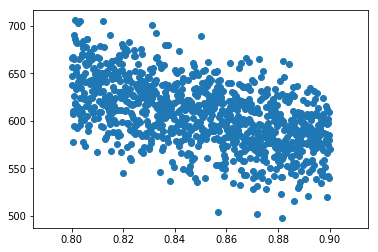

In [4]:
plt.scatter(efficiencies, results)

We can see a different pattern for minimum speed for recuperative braking:

In [9]:
variables = np.linspace(0, 50, 1000)
results = np.array([energy_consumption(
    1300, 0.85, 2.41, 0.721, 80, 0.9, v, 0.01, 0.3, 0.875
    ) for v in variables
])

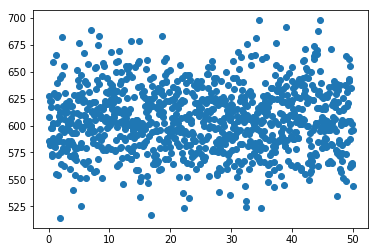

In [10]:
plt.scatter(variables, results)

And a final pattern for surface area:

In [11]:
variables = np.linspace(1.5, 5, 1000)
results = np.array([energy_consumption(
    1300, 0.85, v, 0.721, 80, 0.5, 10, 0.01, 0.3, 0.875
    ) for v in variables
])

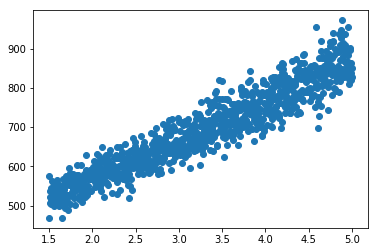

In [12]:
plt.scatter(variables, results)

# Integration into Brightway

In [13]:
import brightway2 as bw

In [14]:
bw.projects.set_current("bw2 seminar 2017 😄")

In [16]:
db = bw.Database("ecoinvent")
car = db.search("electric car")[2]
car

'transport, passenger car, electric, LiMn2O4, city car' (person kilometer, CH, ['transport systems', 'road'])

In [17]:
for x in car.technosphere():
    print(x)

Exchange: 0.625 kilometer 'operation, passenger car, electric, LiMn2O4, city car' (kilometer, CH, ['transport systems', 'road']) to 'transport, passenger car, electric, LiMn2O4, city car' (person kilometer, CH, ['transport systems', 'road'])>
Exchange: 4.1667e-06 unit 'passenger car, electric, LiMn2O4, city car, at plant' (unit, RER, ['transport systems', 'road']) to 'transport, passenger car, electric, LiMn2O4, city car' (person kilometer, CH, ['transport systems', 'road'])>
Exchange: 4.1667e-06 unit 'maintenance, passenger car, electric, LiMn2O4, city car' (unit, RER, ['transport systems', 'road']) to 'transport, passenger car, electric, LiMn2O4, city car' (person kilometer, CH, ['transport systems', 'road'])>
Exchange: 0.00019077 meter-year 'road' (meter-year, CH, ['transport systems', 'road']) to 'transport, passenger car, electric, LiMn2O4, city car' (person kilometer, CH, ['transport systems', 'road'])>
Exchange: 0.0003462 meter-year 'operation, maintenance, road' (meter-year, CH

In [18]:
for x in car.technosphere():
    print(x)
    break

Exchange: 0.625 kilometer 'operation, passenger car, electric, LiMn2O4, city car' (kilometer, CH, ['transport systems', 'road']) to 'transport, passenger car, electric, LiMn2O4, city car' (person kilometer, CH, ['transport systems', 'road'])>


In [19]:
for y in x.input.technosphere():
    print(y)

Exchange: 0.07 kilowatt hour 'electricity, low voltage, at grid' (kilowatt hour, CH, ['electricity', 'supply mix']) to 'operation, passenger car, electric, LiMn2O4, city car' (kilometer, CH, ['transport systems', 'road'])>
